[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\rafab\AppData\Local\Temp\ipykernel_17144\3345909089.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Processed_Text'] = cleaned_data['Title'].astype(str) + ' ' + cleaned_data['Text'].astype(str)
C:\Users\rafab\AppData\Local\Temp\ipykernel_17144\

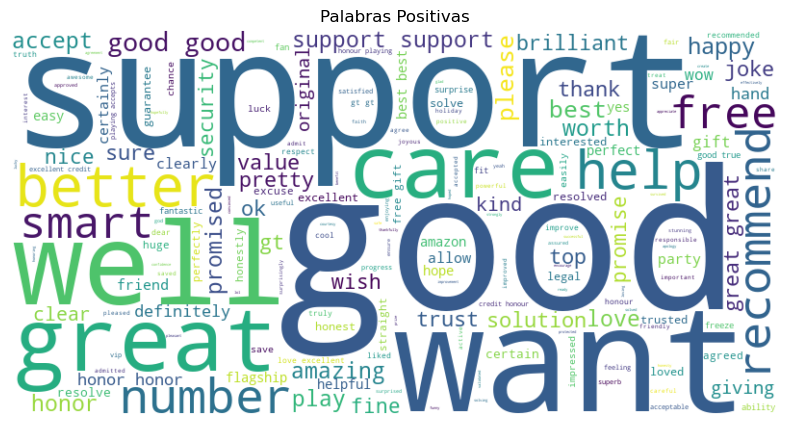

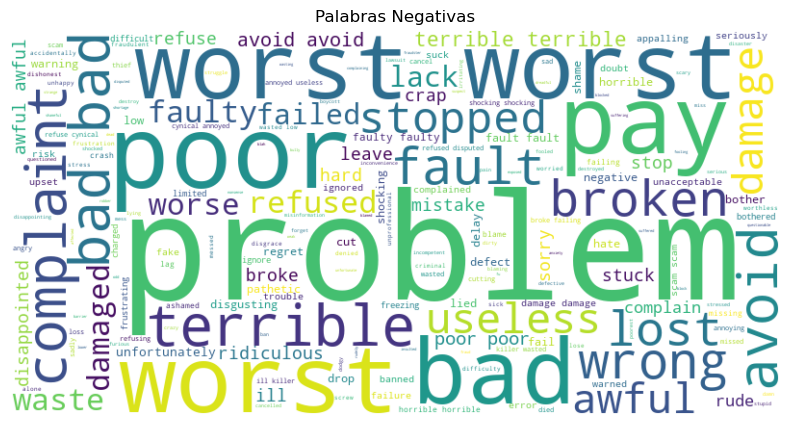

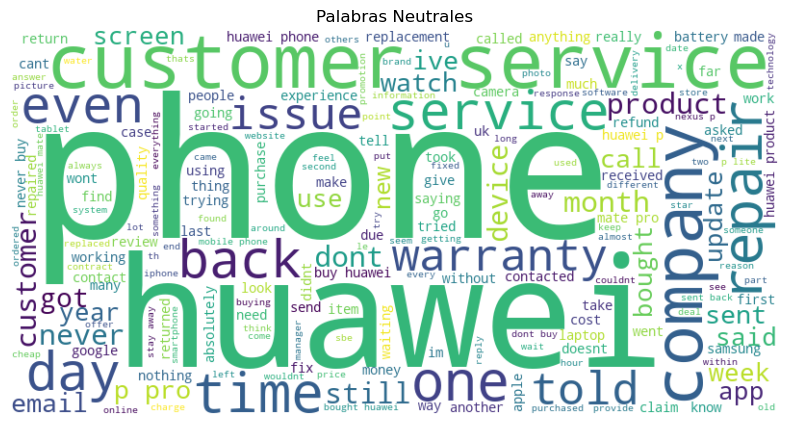

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Instanciar lematizador y analizador de sentimientos
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y caracteres no alfabéticos
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenizar y eliminar stopwords, y lematizar
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Cargar el archivo CSV
file_path = 'Data/Huawei Reviews.csv'
data = pd.read_csv(file_path)

# Eliminar filas con valores nulos en las columnas 'Title' y 'Text'
cleaned_data = data.dropna(subset=['Title', 'Text'])

# Aplicar preprocesamiento al texto combinado
cleaned_data['Processed_Text'] = cleaned_data['Title'].astype(str) + ' ' + cleaned_data['Text'].astype(str)
cleaned_data['Processed_Text'] = cleaned_data['Processed_Text'].apply(preprocess_text)

# Función para clasificar el sentimiento de las palabras
def sentiment_analysis(text):
    pos_words = []
    neg_words = []
    neu_words = []
    
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)
        if score['compound'] >= 0.05:
            pos_words.append(word)
        elif score['compound'] <= -0.05:
            neg_words.append(word)
        else:
            neu_words.append(word)
    
    return pos_words, neg_words, neu_words

# Aplicar análisis de sentimiento al texto preprocesado
combined_text = ' '.join(cleaned_data['Processed_Text'])
pos_words, neg_words, neu_words = sentiment_analysis(combined_text)

# Función para generar y mostrar nubes de palabras
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nube de palabras positivas
generate_wordcloud(pos_words, 'Palabras Positivas')

# Nube de palabras negativas
generate_wordcloud(neg_words, 'Palabras Negativas')

# Nube de palabras neutrales
generate_wordcloud(neu_words, 'Palabras Neutrales')


In [2]:
# Modificar la función para devolver una etiqueta de sentimiento general
def sentiment_label(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar la función a la columna 'Processed_Text' para obtener la etiqueta de sentimiento
cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)
cleaned_data

C:\Users\rafab\AppData\Local\Temp\ipykernel_17144\4149664210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)


,Date,Rating,Name,Title,Text,Response,Data Response,Processed_Text,Sentiment
0,"Updated Jun 17, 2024",5,tony george,I had the p20 pro then the p30 pro and…,I had the p20 pro then the p30 pro and p40 pro...,NaN,NaN,p pro p pro p pro p pro p pro phone infact sti...,Positive
1,21-Jun-24,5,Valters Valpēteris,The best phone company in the world is…,The best phone company in the world is sad tha...,NaN,NaN,best phone company world best phone company wo...,Positive
2,2-May-24,1,Andy,Huawei cable diggers do not care,The company in South Africa are digging to in...,NaN,NaN,huawei cable digger care company south africa ...,Positive
3,19-Apr-24,1,Cristina C,I purchased HUAWEI MATEBOOK D15 and…,I purchased HUAWEI MATEBOOK D15 and wala pang ...,NaN,NaN,purchased huawei matebook purchased huawei mat...,Negative
4,5-May-24,1,Aleksandra M,Would give zero,"One star, as cannot give zero. Bought P60 phon...",NaN,NaN,would give zero one star cannot give zero boug...,Negative
...,...,...,...,...,...,...,...,...,...
911,5-Jan-16,1,Tommy,Really low quality,Stay away from this Chinese discount brand...,NaN,NaN,really low quality stay away chinese discount ...,Negative
912,"Updated Dec 23, 2015",2,S,poor customers services!,Their phone was not delivered. They refused to...,NaN,NaN,poor customer service phone delivered refused ...,Negative
913,2-Sep-15,1,Winston Smith,"BAD, BAD, BAD ...",I had a Huwaei phone last year as part of a mo...,NaN,NaN,bad bad bad huwaei phone last year part mobile...,Negative
914,8-Nov-14,2,Mr Edwin Bradford,Power button on phone broke after one year,I bought a Huawei GL70S Android Phone through ...,NaN,NaN,power button phone broke one year bought huawe...,Negative


In [3]:
def calculate_nps(cleaned_data):
    promoters = cleaned_data[cleaned_data['Rating'] >= 4].shape[0]
    detractors = cleaned_data[cleaned_data['Rating'] <= 2].shape[0]
    passives = cleaned_data[cleaned_data['Rating'] == 3].shape[0]
    total_respondents = cleaned_data.shape[0]
    nps = ((promoters - detractors) / total_respondents) * 100
    return nps, promoters, passives, detractors

nps, promoters, passives, detractors = calculate_nps(cleaned_data)
print(f'Net Promoter Score (NPS): {nps}')

Net Promoter Score (NPS): -61.97975253093363


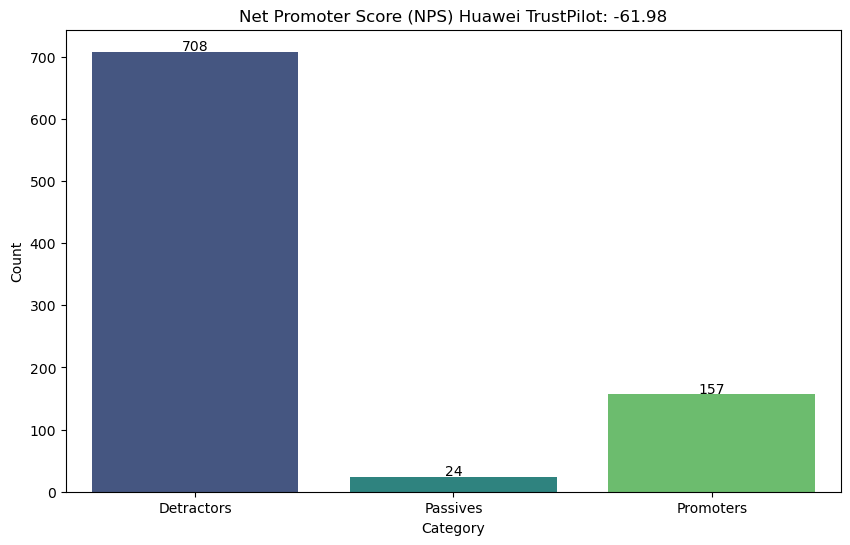

In [4]:
# Datos para la visualización
nps_data = pd.DataFrame({
    'Category': ['Detractors', 'Passives', 'Promoters'],
    'Count': [detractors, passives, promoters]
})

# Crear el gráfico de barras para NPS
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=nps_data, palette='viridis')
plt.title(f'Net Promoter Score (NPS) Huawei TrustPilot: {nps:.2f}')
plt.xlabel('Category')
plt.ylabel('Count')

# Añadir las etiquetas de los valores en las barras
for index, value in enumerate(nps_data['Count']):
    plt.text(index, value + 2, str(value), ha='center')

plt.show()

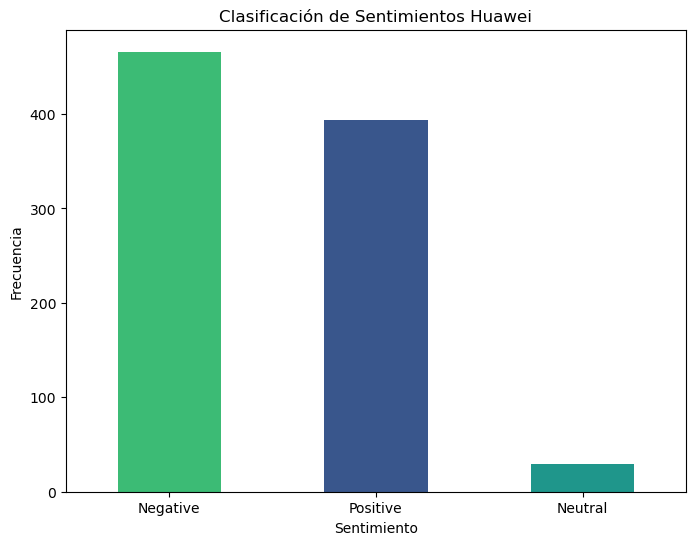

In [5]:
# Contar las ocurrencias de cada sentimiento
conteo_sentimientos = cleaned_data['Sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['#3CBB75FF', '#39568CFF', '#1F968BFF'])

# Establecer títulos y etiquetas
plt.title('Clasificación de Sentimientos Huawei')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar la visualización
plt.show()


In [6]:
# Definimos las palabras clave para cada tema
keywords = {
    'Customer Service': ["service", "support", "help", "customer", "warranty", "experience", "Care", "refund", "coomunication", "repair", "contact"],
    'Staff': ["staff", "employee", "worker", "associate", "unprofessional", "techinician"],
    'Price': ["price", "cost", "expensive", "cheap", "$", "money", "pay"],
    'Ease of Use': ["easy", "difficult", "user-friendly", "complex", "friendly"],
    'Sales': ["sale", "discount", "offer", "sold", "purchased", "purchase"],
    'Delivery': ["slow", "fast", "speed", "punctual", "delayed", "late", "early", "Delivery", "days", "weeks", "months", "week", "day", "month", "forever", "order", "ordered"],
    'Coverage': ["coverage", "network", "signal"],
    'Terms': ["terms", "conditions", "policy", "appliances"],
    'Setup': ["setup", "install", "configuration", "set up", "replacement", "implement", "implementation"],
    'Quality': ["security", "damaged", "material", "product", "broken", "package", "horrible", "good", "best", "worst", "terrible", "glitch", "bug", "impressed", "bad", "Quality", "malfunction", "feature", "issue", "update", "poor", "failed"]
}

# Función para clasificar el tema basado en las palabras clave
def classify_topic(title, text):
    combined_text = f"{title} {text}".lower()
    for topic, words in keywords.items():
        if any(word in combined_text for word in words):
            return topic
    return 'Other'

# Aplicamos la función al DataFrame
cleaned_data['topic'] = cleaned_data.apply(lambda row: classify_topic(row['Title'], row['Processed_Text']), axis=1)

# Mostramos las primeras filas para verificar
cleaned_data.head()


C:\Users\rafab\AppData\Local\Temp\ipykernel_17144\4250437714.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['topic'] = cleaned_data.apply(lambda row: classify_topic(row['Title'], row['Processed_Text']), axis=1)


,Date,Rating,Name,Title,Text,Response,Data Response,Processed_Text,Sentiment,topic
0,"Updated Jun 17, 2024",5,tony george,I had the p20 pro then the p30 pro and…,I had the p20 pro then the p30 pro and p40 pro...,NaN,NaN,p pro p pro p pro p pro p pro phone infact sti...,Positive,Customer Service
1,21-Jun-24,5,Valters Valpēteris,The best phone company in the world is…,The best phone company in the world is sad tha...,NaN,NaN,best phone company world best phone company wo...,Positive,Quality
2,2-May-24,1,Andy,Huawei cable diggers do not care,The company in South Africa are digging to in...,NaN,NaN,huawei cable digger care company south africa ...,Positive,Customer Service
3,19-Apr-24,1,Cristina C,I purchased HUAWEI MATEBOOK D15 and…,I purchased HUAWEI MATEBOOK D15 and wala pang ...,NaN,NaN,purchased huawei matebook purchased huawei mat...,Negative,Customer Service
4,5-May-24,1,Aleksandra M,Would give zero,"One star, as cannot give zero. Bought P60 phon...",NaN,NaN,would give zero one star cannot give zero boug...,Negative,Customer Service


In [7]:
# Prepara los datos para el heatmap
df_topics = cleaned_data['topic'].str.get_dummies(sep=',')
df_topics_sum = df_topics.sum().sort_values(ascending=False)

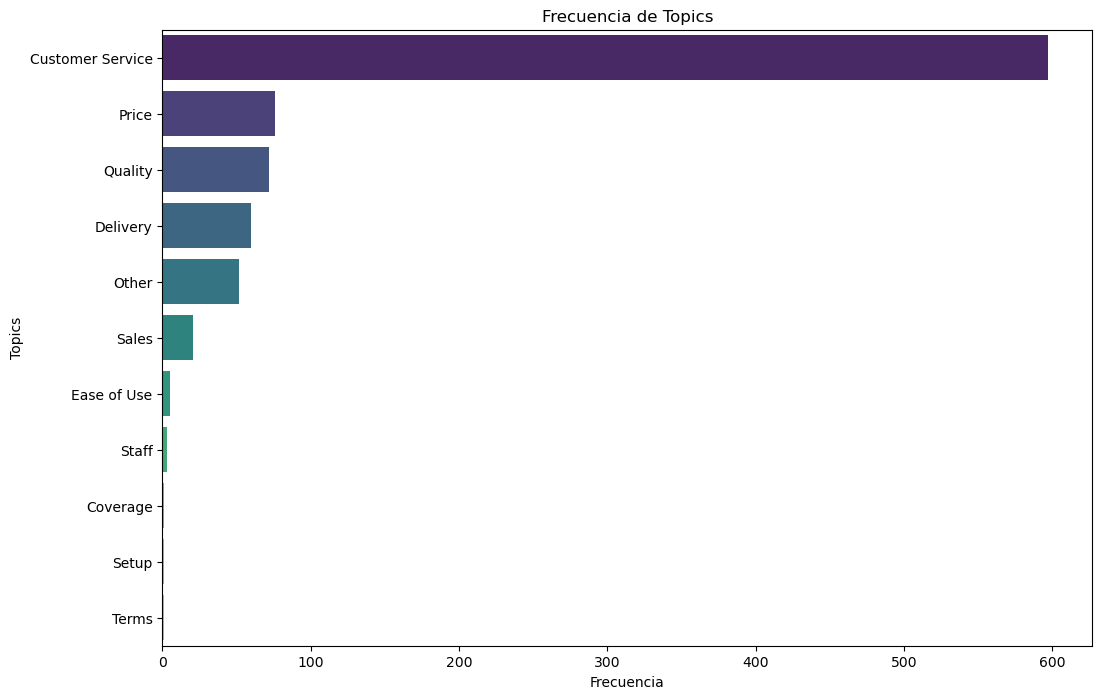

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_topics_sum.values, y=df_topics_sum.index, palette='viridis')
plt.title('Frecuencia de Topics')
plt.xlabel('Frecuencia')
plt.ylabel('Topics')
plt.show()

In [9]:
cleaned_data.to_csv('Huawei_reviews_modificado.csv', index = False)